<a href="https://colab.research.google.com/github/skywalker0803r/Wastewater-Biological-Treatment/blob/main/%E5%9F%BA%E6%96%BC%E6%B3%A8%E6%84%8F%E5%8A%9B%E6%A9%9F%E5%88%B6%E5%9B%9E%E6%AD%B8%E6%A8%A1%E5%9E%8BV2(%E7%B5%B2%E7%8B%80%E8%8F%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/廢水案子/ALLdataset.csv',index_col = 0)
df = df.dropna(axis=0)
df = df.reset_index()
df['date'] = df['date'].astype('str')
df

,date,site,cindex,cName,classification,confidence,D
0,20210927,T753,101,輪蟲幼蟲,101_輪蟲幼蟲,0.371431,39.638027
1,20210927,T753,116,絲狀菌,116_絲狀菌,0.996904,18.817467
2,20210927,T753,125,膜袋蟲,125_膜袋蟲,0.828820,35.845880
3,20210927,T753,116,絲狀菌,116_絲狀菌,0.418498,32.625321
4,20210927,T753,116,絲狀菌,116_絲狀菌,0.998210,22.131402
...,...,...,...,...,...,...,...
954460,20230216,T753,118,尾絲蟲,118_尾絲蟲,0.997261,41.925688
954461,20230216,T753,116,絲狀菌,116_絲狀菌,0.975901,86.942615
954462,20230216,T753,118,尾絲蟲,118_尾絲蟲,0.819361,31.534747
954463,20230216,T753,127,滴蟲,127_滴蟲,0.896282,43.294135


In [109]:
#對蟲和時間進行遍歷
new_dict = {}
df = df[df.cName=='絲狀菌']#在這裡指定種類
for i in df.cName.unique():
  new_dict[i] = pd.DataFrame()#用來存放特定蟲的資料
  for j in tqdm(df.date.unique()):
    # 特定蟲種類在特定日期的數據
    d = df[(df['cName']==i)&(df['date']==j)]
    # 按照百分位(總體)方式分四組Q1,Q2,Q3
    Q1,Q2,Q3 = df.loc[(df['cName']==i),'D'].quantile([0.25, 0.5, 0.75]).values
    # 計算各筆資料的D值算是屬於哪一組
    d['bin'] = d['D'].apply(lambda x: 'Q1' if x <= Q1 else ('Q2' if x <= Q2 else ('Q3' if x <= Q3 else 'Q4')))
    new_dict[i][j] = d.groupby('bin').size()
    print(i,j)# 顯示蟲名稱和時間
    print(d.groupby('bin').size()) #顯示各組筆數

  0%|          | 0/279 [00:00<?, ?it/s]

絲狀菌 20210927
bin
Q1    250
Q2    236
Q3    244
Q4    175
dtype: int64
絲狀菌 20210928
bin
Q1    180
Q2    206
Q3    198
Q4    174
dtype: int64
絲狀菌 20210929
bin
Q1    186
Q2    204
Q3    262
Q4    187
dtype: int64
絲狀菌 20210930
bin
Q1    197
Q2    211
Q3    277
Q4    232
dtype: int64
絲狀菌 20211004
bin
Q1    162
Q2    168
Q3    212
Q4    146
dtype: int64
絲狀菌 20211005
bin
Q1    157
Q2    145
Q3    165
Q4    111
dtype: int64
絲狀菌 20211006
bin
Q1    197
Q2    168
Q3    191
Q4    226
dtype: int64
絲狀菌 20211007
bin
Q1    192
Q2    190
Q3    238
Q4    213
dtype: int64
絲狀菌 20211008
bin
Q1    211
Q2    213
Q3    203
Q4    185
dtype: int64
絲狀菌 20211014
bin
Q1    2462
Q2    1938
Q3    1214
Q4     852
dtype: int64
絲狀菌 20211015
bin
Q1    2436
Q2    1925
Q3    1179
Q4     975
dtype: int64
絲狀菌 20211018
bin
Q1    2027
Q2    1757
Q3    1241
Q4     922
dtype: int64
絲狀菌 20211019
bin
Q1    2503
Q2    1897
Q3    1277
Q4     971
dtype: int64
絲狀菌 20211020
bin
Q1    2513
Q2    2010
Q3    1285
Q4     944
dtype: int64


In [110]:
new_dict

{'絲狀菌':      20210927  20210928  20210929  20210930  20211004  20211005  20211006  \
 bin                                                                         
 Q1        250       180       186       197       162       157       197   
 Q2        236       206       204       211       168       145       168   
 Q3        244       198       262       277       212       165       191   
 Q4        175       174       187       232       146       111       226   
 
      20211007  20211008  20211014  ...  20230203  20230206  20230207  \
 bin                                ...                                 
 Q1        192       211      2462  ...       NaN       NaN       NaN   
 Q2        190       213      1938  ...       NaN       NaN       NaN   
 Q3        238       203      1214  ...      54.0      71.0      70.0   
 Q4        213       185       852  ...      84.0     128.0      96.0   
 
      20230208  20230209  20230210  20230213  20230214  20230215  20230216  
 bin  

In [111]:
'''
df2 = pd.DataFrame()
for i in df['date'].unique():
  df2[i] = df[df['date']==i].D.quantile(q=np.arange(0, 1.1, 0.1))
df2
'''

"\ndf2 = pd.DataFrame()\nfor i in df['date'].unique():\n  df2[i] = df[df['date']==i].D.quantile(q=np.arange(0, 1.1, 0.1))\ndf2\n"

In [112]:
df2 = new_dict['絲狀菌']
df2 = df2.fillna(0)
df2

,20210927,20210928,20210929,20210930,20211004,20211005,20211006,20211007,20211008,20211014,...,20230203,20230206,20230207,20230208,20230209,20230210,20230213,20230214,20230215,20230216
bin,,,,,,,,,,,,,,,,,,,,,
Q1,250,180,186,197,162,157,197,192,211,2462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q2,236,206,204,211,168,145,168,190,213,1938,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q3,244,198,262,277,212,165,191,238,203,1214,...,54.0,71.0,70.0,66.0,70.0,27.0,52.0,48.0,56.0,56.0
Q4,175,174,187,232,146,111,226,213,185,852,...,84.0,128.0,96.0,133.0,127.0,83.0,84.0,73.0,111.0,105.0


In [113]:
def normalize(df):
    for col in df.columns:
        df[col] = df[col] / df[col].sum()
    return df

df2 = normalize(df2.copy())
df2

,20210927,20210928,20210929,20210930,20211004,20211005,20211006,20211007,20211008,20211014,...,20230203,20230206,20230207,20230208,20230209,20230210,20230213,20230214,20230215,20230216
bin,,,,,,,,,,,,,,,,,,,,,
Q1,0.276243,0.237467,0.221692,0.214831,0.235465,0.271626,0.251918,0.230492,0.259852,0.380761,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Q2,0.260773,0.271768,0.243147,0.230098,0.244186,0.250865,0.214834,0.228091,0.262315,0.299722,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Q3,0.269613,0.261214,0.312277,0.302072,0.308140,0.285467,0.244246,0.285714,0.250000,0.187751,...,0.391304,0.356784,0.421687,0.331658,0.35533,0.245455,0.382353,0.396694,0.335329,0.347826
Q4,0.193370,0.229551,0.222884,0.252999,0.212209,0.192042,0.289003,0.255702,0.227833,0.131766,...,0.608696,0.643216,0.578313,0.668342,0.64467,0.754545,0.617647,0.603306,0.664671,0.652174


In [114]:
df2.sum(axis=0)

20210927    1.0
20210928    1.0
20210929    1.0
20210930    1.0
20211004    1.0
           ... 
20230210    1.0
20230213    1.0
20230214    1.0
20230215    1.0
20230216    1.0
Length: 279, dtype: float64

# batch,features_size,time_step

In [115]:
import numpy as np

X_train = []
y_train = []

for i in range(0, len(df2.columns), 14):
    x = df2.iloc[:,i:i+7].values
    y = df2.iloc[:,i+7:i+14].values
    cond1 = x.shape[1] == 7
    cond2 = y.shape[1] == 7
    if cond1 and cond2 :
      X_train.append(x)
      y_train.append(y)

X = np.array(X_train)
y = np.array(y_train)

print(X.shape, y.shape)


(19, 4, 7) (19, 4, 7)


# 基於注意力機制(transformer核心精神)的回歸模型

In [116]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class AttentionModule(nn.Module):
    def __init__(self, input_channels):
        super(AttentionModule, self).__init__()

        self.query_conv = nn.Conv1d(in_channels=input_channels, out_channels=input_channels // 2, kernel_size=1)
        self.key_conv = nn.Conv1d(in_channels=input_channels, out_channels=input_channels // 2, kernel_size=1)
        self.value_conv = nn.Conv1d(in_channels=input_channels, out_channels=input_channels, kernel_size=1)

        self.gamma = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        batch_size, channels, width = x.size()

        proj_query = self.query_conv(x).view(batch_size, -1, width).permute(0, 2, 1)
        proj_key = self.key_conv(x).view(batch_size, -1, width)
        energy = torch.bmm(proj_query, proj_key)

        #attention = F.softmax(energy, dim=-1)
        attention = F.normalize(energy, p=1, dim=-1)

        proj_value = self.value_conv(x).view(batch_size, -1, width)
        out = torch.bmm(proj_value, attention.permute(0, 2, 1))
        out = out.view(batch_size, channels, width)

        out = self.gamma * out + x
        return out,attention

class AttentionModel(nn.Module):
    def __init__(self):
        super(AttentionModel, self).__init__()

        self.attention = AttentionModule(input_channels=4)

    def forward(self, x):
        x,attention = self.attention(x)
        return x,attention

# 測試模型
model = AttentionModel()
from sklearn.model_selection import train_test_split
input_matrix = torch.from_numpy(X).float()
target_matrix = torch.from_numpy(y).float()
X_train, X_test, y_train, y_test = train_test_split(input_matrix, target_matrix, test_size=0.33, random_state=42)
# Forward pass
output_tensor,attention = model(input_matrix)
print("Input shape:", input_matrix.shape)
print("Output shape:", output_tensor.shape)
print("attention shape:", attention.shape)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

Input shape: torch.Size([19, 4, 7])
Output shape: torch.Size([19, 4, 7])
attention shape: torch.Size([19, 7, 7])
torch.Size([12, 4, 7]) torch.Size([7, 4, 7]) torch.Size([12, 4, 7]) torch.Size([7, 4, 7])


In [117]:
print("Input Matrix:")
print(input_matrix)
print("Output Matrix after Attention:")
print(output_tensor)
print('attn_weights')
print(attention)

Input Matrix:
tensor([[[0.2762, 0.2375, 0.2217, 0.2148, 0.2355, 0.2716, 0.2519],
         [0.2608, 0.2718, 0.2431, 0.2301, 0.2442, 0.2509, 0.2148],
         [0.2696, 0.2612, 0.3123, 0.3021, 0.3081, 0.2855, 0.2442],
         [0.1934, 0.2296, 0.2229, 0.2530, 0.2122, 0.1920, 0.2890]],

        [[0.3494, 0.3455, 0.3428, 0.2750, 0.3859, 0.3488, 0.3633],
         [0.3048, 0.2935, 0.3020, 0.2857, 0.2894, 0.2790, 0.2743],
         [0.2018, 0.2118, 0.2114, 0.2748, 0.1844, 0.2088, 0.1990],
         [0.1440, 0.1492, 0.1438, 0.1645, 0.1402, 0.1634, 0.1634]],

        [[0.3523, 0.3655, 0.3547, 0.3589, 0.3589, 0.3742, 0.3824],
         [0.2181, 0.2949, 0.2823, 0.2782, 0.2763, 0.2822, 0.2837],
         [0.1913, 0.2129, 0.2036, 0.2046, 0.1889, 0.2218, 0.2088],
         [0.2383, 0.1268, 0.1595, 0.1584, 0.1759, 0.1217, 0.1252]],

        [[0.3683, 0.3375, 0.3520, 0.3408, 0.3551, 0.3357, 0.3238],
         [0.2975, 0.2958, 0.2872, 0.3025, 0.2915, 0.3019, 0.3120],
         [0.2066, 0.2307, 0.2261, 0.2265, 

# 訓練模型

In [118]:
import torch.optim as optim

# 定義損失函數和優化器
criterion = nn.SmoothL1Loss()  # 使用均方誤差作為損失函數
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # 使用Adam優化器

# 訓練模型
num_epochs = 500
torch_input = X_train
target = y_train
loss_list = []

for epoch in range(num_epochs):
    # 將模型設置為訓練模式
    model.train()

    # 前向傳播
    output = model(torch_input)

    # 計算損失
    loss = criterion(output[0], target[0])  # 這裡的target是你的目標輸出，需要根據你的任務而定
    loss_list.append(loss.detach())

    # 反向傳播 梯度下降 清空梯度
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # 每隔一段時間印出一次損失
    if epoch % 5 == 0:
        print(f'Epoch {epoch}/{num_epochs}, Loss: {loss.item()}')

# 訓練完成後，你可以使用模型進行預測
model.eval()
final_output = model(torch_input)
print("Final Model Output:")


Epoch 0/500, Loss: 0.008434690535068512
Epoch 5/500, Loss: 0.00843439158052206
Epoch 10/500, Loss: 0.00843406468629837
Epoch 15/500, Loss: 0.008433700539171696
Epoch 20/500, Loss: 0.008433250710368156
Epoch 25/500, Loss: 0.008432603441178799
Epoch 30/500, Loss: 0.008431468158960342
Epoch 35/500, Loss: 0.008429582230746746
Epoch 40/500, Loss: 0.008426903747022152
Epoch 45/500, Loss: 0.008423490449786186
Epoch 50/500, Loss: 0.00841940101236105
Epoch 55/500, Loss: 0.008415522053837776
Epoch 60/500, Loss: 0.008412579074501991
Epoch 65/500, Loss: 0.008409716188907623
Epoch 70/500, Loss: 0.008406750857830048
Epoch 75/500, Loss: 0.008403697982430458
Epoch 80/500, Loss: 0.008400559425354004
Epoch 85/500, Loss: 0.008397325873374939
Epoch 90/500, Loss: 0.008393991738557816
Epoch 95/500, Loss: 0.008390546776354313
Epoch 100/500, Loss: 0.008386979810893536
Epoch 105/500, Loss: 0.008383266627788544
Epoch 110/500, Loss: 0.008379336446523666
Epoch 115/500, Loss: 0.008375151082873344
Epoch 120/500, Lo

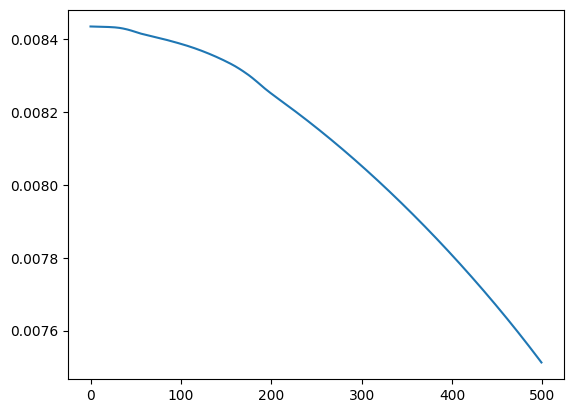

In [119]:
import matplotlib.pyplot as plt
plt.plot(loss_list)

In [120]:
final_output[0][0]

tensor([[0.2045, 0.1672, 0.2080, 0.1262, 0.1433, 0.1015, 0.2146],
        [0.2662, 0.2666, 0.2655, 0.2137, 0.2321, 0.1943, 0.2616],
        [0.3056, 0.3438, 0.2905, 0.3524, 0.3178, 0.3195, 0.2838],
        [0.2488, 0.2515, 0.2585, 0.3316, 0.3270, 0.3981, 0.2613]],
       grad_fn=<SelectBackward0>)

In [121]:
y_train[0]

tensor([[0.2228, 0.1126, 0.1358, 0.1982, 0.1079, 0.1363, 0.1135],
        [0.2526, 0.2163, 0.2032, 0.2587, 0.2065, 0.2261, 0.2401],
        [0.2797, 0.3161, 0.3027, 0.2695, 0.3313, 0.2909, 0.2847],
        [0.2450, 0.3549, 0.3583, 0.2736, 0.3543, 0.3467, 0.3618]])

# test data predict

In [122]:
model.eval()
y_pred = model(X_test)

In [123]:
y_pred[0][0]

tensor([[0.2664, 0.2276, 0.2119, 0.2050, 0.2256, 0.2618, 0.2421],
        [0.2535, 0.2645, 0.2359, 0.2228, 0.2369, 0.2436, 0.2076],
        [0.2996, 0.2912, 0.3422, 0.3320, 0.3381, 0.3154, 0.2743],
        [0.2129, 0.2491, 0.2424, 0.2725, 0.2317, 0.2116, 0.3086]],
       grad_fn=<SelectBackward0>)

In [124]:
y_test[0]

tensor([[0.2305, 0.2599, 0.3808, 0.3739, 0.3408, 0.3765, 0.3722],
        [0.2281, 0.2623, 0.2997, 0.2955, 0.2954, 0.2853, 0.2977],
        [0.2857, 0.2500, 0.1878, 0.1810, 0.2087, 0.1921, 0.1903],
        [0.2557, 0.2278, 0.1318, 0.1497, 0.1550, 0.1461, 0.1398]])

In [130]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error
from math import sqrt

r2_score(y_test[0], y_pred[0][0].detach())

-1.1431123530074525

In [126]:
sqrt(mean_squared_error(y_test[0], y_pred[0][0].detach()))

0.10033470091592027

In [127]:
mean_absolute_percentage_error(y_test[0], y_pred[0][0].detach())

0.39424294

In [128]:
res = pd.DataFrame()
res['r2'] = [r2_score(y_test[0], y_pred[0][0].detach())]
res['rmse'] = [sqrt(mean_squared_error(y_test[0], y_pred[0][0].detach()))]
res['mape'] = [mean_absolute_percentage_error(y_test[0], y_pred[0][0].detach())]
res

,r2,rmse,mape
0,-1.143112,0.100335,0.394243
